<a href="https://colab.research.google.com/github/yasmienAshraf/Project1/blob/main/AraBERT__NLP_Sentiment_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AraBERT NLP Sentiment Ananlysis based on X platform posts

---
---

# WELCOME!

Welcome to the " **AraBERT Sentiment Analysis Project** " , this is our project for the ***Advanced Computational Tools*** and ***Machine Learning*** courses in our first semester.

This project focuses on using Deep learning Models ( **AraBERT** ) for arabic sentiment analysis , We use ***MARSA*** dataset after EDA and Preprocessing for training and testing AraBERT model, which can be accessed at:  

" https://github.com/imamu-asa/ASA/tree/main/MARSA-Dataset".

The goal of this project is to determine the sentiment analysis of X posts, Classifing them as  positive, negative or neutral based on thier Words.

One of the main challenges in this project is collecting a set of posts to validate our model effectively. Additionally, developing a robust model that can handle various arabic expressions is another challenge.

by the end of this project, we aim to build effective sentiment classification model using Deep learning.

Before diving into the project, lets outline our Tasks.



# Tasks:-

## 1- Exploratory Data Analysis
-  Import Modules

-  Import Marsa data

-  Explore data characteristics

-  Data Visualization

    - Polarity Distribution
    - Data wrangling
    - Word Cloud (pos-neg)
    - Text Length Analysis

## 2- Data Preprocessing
-  Spam Detection

- Data Cleaning

- Text Normalization and Lemmatization

- BERT Tokenization




# Import Libraries, Load and Discover the Data

In [ ]:
pip install torch transformers textblob seaborn datasets

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import re
from textblob import Word
from transformers import BertTokenizer, BertModel
from collections import Counter

# Fetch Our Data

#### Using Marsa Dataset

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
!cp "/content/drive/My Drive/Colab Notebooks/All_Training_80%.csv" "All_Training_80%.csv"

In [98]:
# Load the data
df_original = pd.read_csv("All_Training_80%.csv")

# Display the first 5 rows of the  data to understand its structure
print("\n \033[1m 1-Sample of the Data:\033[0m")
display(df_original.head())

# Get information about the data
print(" \n \033[1m 2-Information about the Data: \033[0m\n")
df_original.info()

# Display data distribution of labels (e.g., positive/negative)
print("\n \033[1m 3-Distribution of Polarity : \033[0m ")
df_original.Polarity.value_counts()



  1-Sample of the Data:


,Tweet,Polarity
0,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان...,pos
1,بمزيدا من الفخر والاعتزاز تزف شيعيه امير المؤ...,pos
2,توقيت اعدام نمر النمر عيد راس السنه لغير المس...,pos
3,خلفه رجال الشيخ_النمر_شهيدا الشيخ_النمر القطي...,pos
4,رحم الشيخ الشهيد النمر,pos


 
  2-Information about the Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45436 entries, 0 to 45435
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     45436 non-null  object
 1   Polarity  45436 non-null  object
dtypes: object(2)
memory usage: 710.1+ KB

  3-Distribution of Polarity :  


,count
Polarity,
neg,16587
neut,14985
pos,13864


In [99]:
# Rename the column 'Tweet' to 'Post'
df_original = df_original.rename(columns={'Tweet': 'Post'})

# Display the first few rows to confirm the change
display(df_original.head())

,Post,Polarity
0,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان...,pos
1,بمزيدا من الفخر والاعتزاز تزف شيعيه امير المؤ...,pos
2,توقيت اعدام نمر النمر عيد راس السنه لغير المس...,pos
3,خلفه رجال الشيخ_النمر_شهيدا الشيخ_النمر القطي...,pos
4,رحم الشيخ الشهيد النمر,pos


# Data Wrangling

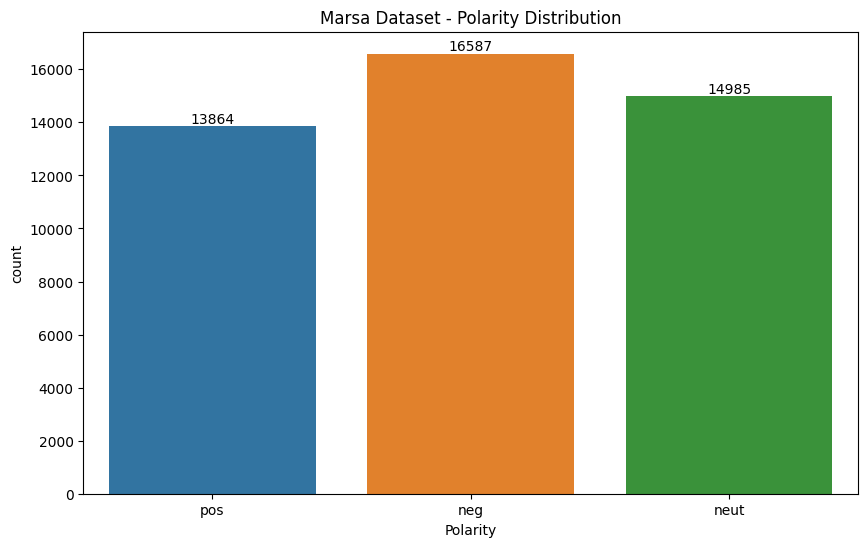

In [100]:
# Create the figure and set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the chart using seaborn
ax = sns.countplot(x='Polarity', data=df_original, hue='Polarity')

# Add numbers above the bars
for p in ax.containers:
    ax.bar_label(p)

# Add a title to the plot
plt.title('Marsa Dataset - Polarity Distribution')

# Display the plot
plt.show()

# Text Length Analysis

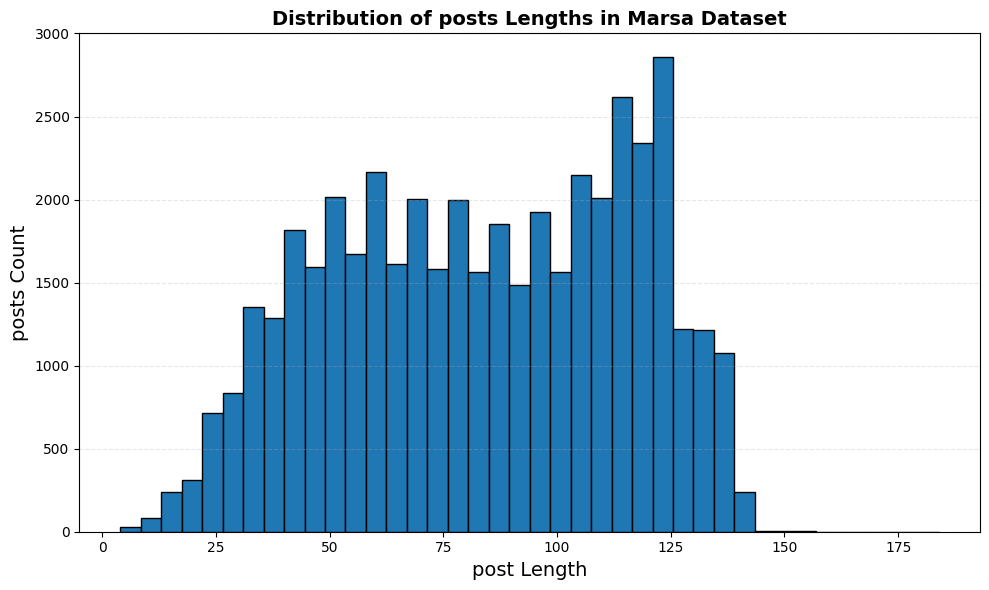

In [101]:
df_original = df_original[df_original['Post'].apply(len)<= 200]

# Plot a histogram of text lengths with improved aesthetics
plt.figure(figsize=(10, 6))  # figure size values for visualization
plt.hist(df_original['Post'].apply(len), bins=40, color='#1f77b4', edgecolor='black') # colours
plt.title('Distribution of posts Lengths in Marsa Dataset', fontsize=14, fontweight='bold') # Title
plt.xlabel('post Length', fontsize=14) #X_label
plt.ylabel('posts Count', fontsize=14) #Y_label
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Add gridlines for clarity
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


In [102]:
print(df_original['Polarity'].unique())

['pos' 'neg' 'neut']


In [103]:
df_original['Polarity'] = df_original['Polarity'].map({'neg': 0, 'pos': 1, 'neut': 2}) #Mapping negative, positive and neutral to (0,1,2)

In [104]:
print(df_original['Polarity'].unique())

[1 0 2]


# Data Preprocessing  

### Removing Duplicates

In [105]:
repeat=[]                                             # Creates a list repeat to store the indices of dublicated tweets
list_of_Posts = df_original['Post'].to_list()         # Convert post column from DF into a list
for i in range(len(list_of_Posts)-1):                 # For loop iterates over index i of each tweet (length -1 because it starts from 0)
  if list_of_Posts[i] in list_of_Posts[i+1:]:         # Check if the post is found anywhere in the rest of the list (i+1)
    repeat.append(i)
len(repeat)

1122

In [106]:
df_original.drop(repeat,axis=0,inplace=True)          # Delete all duplicates rows
df_original.reset_index(drop=True, inplace=True)      # Reset the index so data will be sequential again
len(df_original)

44312

In [107]:
df_original['pre_clean_len'] = [len(t) for t in df_original.Post] #Number of caracters (the length) in each post

df_original

,Post,Polarity,pre_clean_len
0,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان...,1,114
1,توقيت اعدام نمر النمر عيد راس السنه لغير المس...,1,112
2,خلفه رجال الشيخ_النمر_شهيدا الشيخ_النمر القطي...,1,106
3,رحم الشيخ الشهيد النمر,1,23
4,عضو المجلس القومي لحقوق الانسان في مصر كمال ا...,1,117
...,...,...,...
44307,ابدعتي,1,7
44308,احسنتي,1,7
44309,اول جمعه في عامنا هذا اللهم اسق امانينا بماا ...,1,118
44310,اي والله لها معي سنه او اكثر ممتازه جدا,1,40


# Spam Detection

In [108]:
shl_positive = pd.read_csv('/content/drive/My Drive/Colab Notebooks/shl_positive.csv')
shl_negative = pd.read_csv('/content/drive/My Drive/Colab Notebooks/shl_negative.csv')
shl_lexicon = list(shl_positive['V1']) + list(shl_negative['V1'])

In [109]:
def spam_detection(post, asdl_lexicon, shl_lexicon):
    # Split the post into words
    words = post.split()

    # Initialize a counter for spam words and hashtags
    spam_word_count = 0
    hashtag_count = post.count('#')  # Count hashtags in the post

    # Check if any word in the post belongs to the ASDL lexicon
    for word in words:
        if word in asdl_lexicon:
            spam_word_count += 1

    # Determine if the post is spam
    if spam_word_count > 0:  # If any spam word is found
        return 'Spam'
    elif hashtag_count >= 4:  # If there are 4 or more hashtags
        for word in words:
            if word in shl_lexicon:  # If any word belongs to SHL lexicon
                return 'Non-Spam'
        return 'Spam'  # If no SHL word is found
    else:
        return 'Non-Spam'

posts = [
    "شركة تقدم عرض خاص #عرض",
    "أنا احب التكنولوجيا #حب #تطور",
    "أنا احب التكنولوجيا مررره",
    "شغرة اسمه ورشة عمل مختصره لحدث #احتفالي",
    " حضرت امس ورشة عمل تخص الذكاء الاصطناعي #عرض"
]

for post in posts:
    result = spam_detection(post, asdl_lexicon, shl_lexicon)
    print(f"Post: {post}\nSpam Detection Result: {result}\n")

Post: شركة تقدم عرض خاص #عرض
Spam Detection Result: Spam

Post: أنا احب التكنولوجيا #حب #تطور
Spam Detection Result: Non-Spam

Post: أنا احب التكنولوجيا مررره
Spam Detection Result: Non-Spam

Post: شغرة اسمه ورشة عمل مختصره لحدث #احتفالي
Spam Detection Result: Non-Spam

Post:  حضرت امس ورشة عمل تخص الذكاء الاصطناعي #عرض
Spam Detection Result: Non-Spam



#### Applying the Spam detection function in our data

In [110]:
# Apply the spam_detection function to each post in the DataFrame and create a new column "spam_flag" for the results
df_original['spam_flag'] = df_original['Post'].apply(lambda post: spam_detection(post, asdl_lexicon, shl_lexicon))

# Filter out the rows where the spam_flag is "Spam"
df_cleaned = df_original[df_original['spam_flag'] != 'Spam'].copy()

#  reset the index of the cleaned and original DataFrame
df_cleaned.reset_index(drop=True, inplace=True)
df_original.reset_index(drop=True, inplace=True)

# Drop the spam_flag column if no longer needed
df_cleaned.drop('spam_flag', axis=1, inplace=True)

# Display the cleaned DataFrame
df_cleaned

,Post,Polarity,pre_clean_len
0,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان...,1,114
1,توقيت اعدام نمر النمر عيد راس السنه لغير المس...,1,112
2,خلفه رجال الشيخ_النمر_شهيدا الشيخ_النمر القطي...,1,106
3,رحم الشيخ الشهيد النمر,1,23
4,عضو المجلس القومي لحقوق الانسان في مصر كمال ا...,1,117
...,...,...,...
44253,ابدعتي,1,7
44254,احسنتي,1,7
44255,اول جمعه في عامنا هذا اللهم اسق امانينا بماا ...,1,118
44256,اي والله لها معي سنه او اكثر ممتازه جدا,1,40


# Data Cleaning

In [111]:
# Data cleaning function definition
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

#use regular expression for discard hashtag, numbers, english letters, symbols
#use the beautiful soup for decoding the HTML and removing emojis
import re
from bs4 import BeautifulSoup

In [112]:
pat1 = r'@[A-Za-z0-9_]+'#remove users
pat2 = r'https?://[^ ]+'#websites
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'#websites
arabic_num_pat = '[٠١٢٣٤٥٦٧٨٩]'#arabic numbers
eng_num_pat = '[0123456789]'#english numbers
sharta_pat = '[_]'
#sharta_pat = '_[أ-ي]+' #for removing hashtag
eng_pat = '[A-Za-z]'#any english letters

def post_cleaner(text):
  soup = BeautifulSoup(text, 'lxml')
  souped = soup.get_text()
  try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")#HTML encoding didnt decode properly so we decode it again
  except:
        bom_removed = souped
  stripped = re.sub(combined_pat, '', bom_removed)
  stripped = re.sub(www_pat, '', stripped)
  stripped = re.sub(arabic_num_pat, '', stripped)
  stripped = re.sub(eng_num_pat, '', stripped)
  #stripped = re.sub(r'\w+_\s?','_',stripped) #for removing hashtag
  stripped = re.sub(sharta_pat, ' ', stripped)
  stripped = re.sub(eng_pat, ' ', stripped)

  words = [x for x in tok.tokenize(stripped) if len(x) > 1]#tokenize the tweets to separate words for cleaning
  return (" ".join(words)).strip() #return cleaned tweets

In [113]:
df_cleaned['cleaned_text'] = df_cleaned['Post'].apply(lambda text: post_cleaner(text))


In [114]:
df_cleaned['after_clean_len'] = [len(t) for t in df_cleaned.cleaned_text]
df_cleaned

,Post,Polarity,pre_clean_len,cleaned_text,after_clean_len
0,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان...,1,114,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان ...,112
1,توقيت اعدام نمر النمر عيد راس السنه لغير المس...,1,112,توقيت اعدام نمر النمر عيد راس السنه لغير المسل...,110
2,خلفه رجال الشيخ_النمر_شهيدا الشيخ_النمر القطي...,1,106,خلفه رجال الشيخ النمر شهيدا الشيخ النمر القطيف...,104
3,رحم الشيخ الشهيد النمر,1,23,رحم الشيخ الشهيد النمر,22
4,عضو المجلس القومي لحقوق الانسان في مصر كمال ا...,1,117,عضو المجلس القومي لحقوق الانسان في مصر كمال ال...,116
...,...,...,...,...,...
44253,ابدعتي,1,7,ابدعتي,6
44254,احسنتي,1,7,احسنتي,6
44255,اول جمعه في عامنا هذا اللهم اسق امانينا بماا ...,1,118,اول جمعه في عامنا هذا اللهم اسق امانينا بماا ج...,116
44256,اي والله لها معي سنه او اكثر ممتازه جدا,1,40,اي والله لها معي سنه او اكثر ممتازه جدا,39


# Text Normalizationtrain





In [115]:
import re
from textblob import Word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
# Function for text normalization and lemmatization
def normalize_text(text):
    # Remove specific Arabic letters
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'[إأٱآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ة', 'ه', text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    # Remove diacritics (التشكيل)
    arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(arabic_diacritics, '', text)

    # Lemmatization using TextBlob (Arabic lemmatization is limited)
    text = ' '.join([Word(word).lemmatize() for word in text.split()])

    return text

# Apply the normalization function to the df_cleaned DataFrame
df_cleaned['final_text'] = df_cleaned['cleaned_text'].apply(lambda text: normalize_text(text))
df_cleaned

,Post,Polarity,pre_clean_len,cleaned_text,after_clean_len,final_text
0,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان...,1,114,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان ...,112,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان ...
1,توقيت اعدام نمر النمر عيد راس السنه لغير المس...,1,112,توقيت اعدام نمر النمر عيد راس السنه لغير المسل...,110,توقيت اعدام نمر النمر عيد راس السنه لغير المسل...
2,خلفه رجال الشيخ_النمر_شهيدا الشيخ_النمر القطي...,1,106,خلفه رجال الشيخ النمر شهيدا الشيخ النمر القطيف...,104,خلفه رجال الشيخ النمر شهيدا الشيخ النمر القطيف...
3,رحم الشيخ الشهيد النمر,1,23,رحم الشيخ الشهيد النمر,22,رحم الشيخ الشهيد النمر
4,عضو المجلس القومي لحقوق الانسان في مصر كمال ا...,1,117,عضو المجلس القومي لحقوق الانسان في مصر كمال ال...,116,عضو المجلس القومي لحقوق الانسان في مصر كمال ال...
...,...,...,...,...,...,...
44253,ابدعتي,1,7,ابدعتي,6,ابدعتي
44254,احسنتي,1,7,احسنتي,6,احسنتي
44255,اول جمعه في عامنا هذا اللهم اسق امانينا بماا ...,1,118,اول جمعه في عامنا هذا اللهم اسق امانينا بماا ج...,116,اول جمعه في عامنا هذا اللهم اسق امانينا بما جو...
44256,اي والله لها معي سنه او اكثر ممتازه جدا,1,40,اي والله لها معي سنه او اكثر ممتازه جدا,39,اي والله لها معي سنه او اكثر ممتازه جدا


## Most common words analysis

In [66]:
from collections import Counter

# Split the text into individual words and find the most common words
all_words = ' '.join(df_cleaned['final_text']).split()  # Using the 'Post' column after the cleaning process
word_freq = Counter(all_words)

# Display the 10 most common words in the dataset
print("\nMost common words in the final dataset:")
print(word_freq.most_common(20))


Most common words in the final dataset:
[('الهلال', 18308), ('في', 14731), ('من', 10843), ('علي', 6122), ('الاهلي', 5621), ('السعوديه', 5252), ('الدراسه', 5143), ('تعليق', 5125), ('الله', 4816), ('برشلونه', 4037), ('روما', 3881), ('القصيم', 3655), ('النصر', 3511), ('ان', 3210), ('التعاون', 2887), ('الاتحاد', 2850), ('يا', 2614), ('لا', 2521), ('رفع', 2379), ('كل', 2372)]


In [67]:
# Create a new DataFrame with final_text and polarity columns for saving
df_clean = df_cleaned[['final_text', 'Polarity']].copy()

In [68]:
df_clean

,final_text,Polarity
0,بعد ابلاغه بصدور التصديق بحكم الاعدام ضده كان ...,1
1,توقيت اعدام نمر النمر عيد راس السنه لغير المسل...,1
2,خلفه رجال الشيخ النمر شهيدا الشيخ النمر القطيف...,1
3,رحم الشيخ الشهيد النمر,1
4,عضو المجلس القومي لحقوق الانسان في مصر كمال ال...,1
...,...,...
44253,ابدعتي,1
44254,احسنتي,1
44255,اول جمعه في عامنا هذا اللهم اسق امانينا بما جو...,1
44256,اي والله لها معي سنه او اكثر ممتازه جدا,1


Saving the final edit in drive

In [69]:
# Save the df_final DataFrame to a CSV file in your drive
df_clean.to_csv('/content/drive/My Drive/final_cleaning.csv', index=False, encoding='utf-8-sig')

# Word Cloud

In [ ]:
!pip install wordcloud
!pip install arabic-reshaper
!pip install python-bidi

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


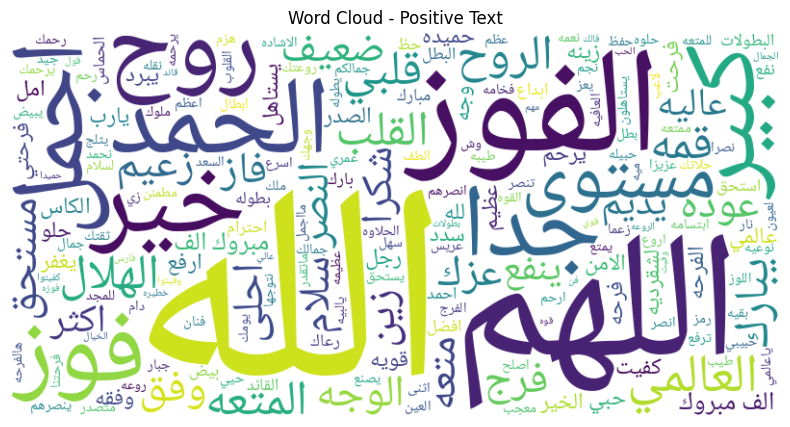

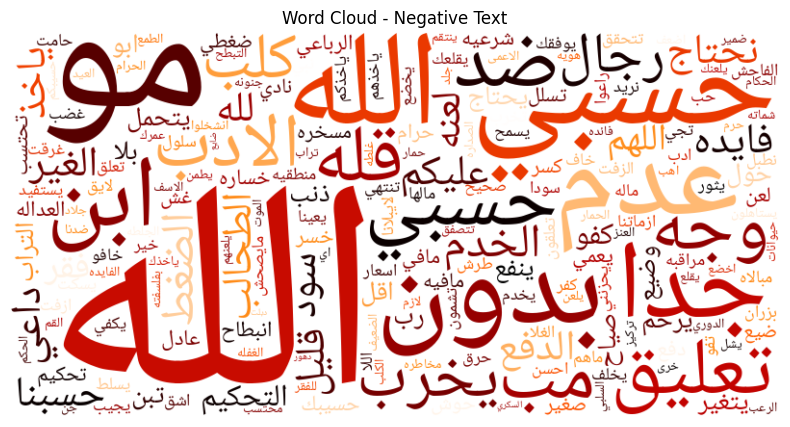

In [90]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords for Arabic
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

# Load the positive and negative words CSV files
pos_words = pd.read_csv('/content/drive/My Drive/Colab Notebooks/shl_positive.csv')
neg_words = pd.read_csv('/content/drive/My Drive/Colab Notebooks/shl_negative.csv')

# Combine the words into a single string for each file
pos_text = ' '.join(pos_words['V1'].astype(str))  # For positive words
neg_text = ' '.join(neg_words['V1'].astype(str))  # For negative words

cleaned_positive_text = ' '.join([word for word in pos_text.split() if word not in arabic_stopwords])
cleaned_negative_text = ' '.join([word for word in neg_text.split() if word not in arabic_stopwords])

# Set the path to the Arabic font
font_path = '/content/drive/My Drive/Colab Notebooks/NotoNaskhArabic-VariableFont_wght.ttf'

# Create a Word Cloud for positive text
wordcloud_positive = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(cleaned_positive_text)

# Create a Word Cloud for negative text
wordcloud_negative = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='gist_heat').generate(cleaned_negative_text)

# Display the Word Cloud for positive text
plt.figure(figsize=(10,5))
plt.title('Word Cloud - Positive Text')
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the Word Cloud for negative text
plt.figure(figsize=(10,5))
plt.title('Word Cloud - Negative Text')
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

# AraBERT Tokenization

In [91]:
from transformers import AutoTokenizer
import torch
import pandas as pd

# Load AraBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02')

# Tokenize the text in the 'final_text' column
encoded_data = df_clean['final_text'].apply(lambda x: tokenizer.encode_plus(
    x,
    max_length=100,  # Maximum length of the sequence
    padding='max_length',  # Pad sequences to the max length
    truncation=True,  # Truncate longer sequences
    return_attention_mask=True,  # Return attention masks
    return_tensors='pt'  # Return the results as PyTorch tensors
))

# Extract input_ids and attention_mask
input_ids = torch.cat([item['input_ids'] for item in encoded_data])
attention_masks = torch.cat([item['attention_mask'] for item in encoded_data])

# Save tokenized data as CSV or tensors
torch.save(input_ids, 'input_ids.pt')
torch.save(attention_masks, 'attention_masks.pt')

# Optional: If you want to save to CSV instead
df_tokenized = pd.DataFrame({
    'input_ids': input_ids.tolist(),
    'attention_mask': attention_masks.tolist()
})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [92]:
df_tokenized

,input_ids,attention_mask
0,"[2, 446, 28422, 195, 37878, 25409, 8530, 25615...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[2, 14781, 44775, 18707, 20368, 3210, 10964, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[2, 17090, 1994, 1158, 20368, 24774, 1158, 203...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[2, 13937, 1158, 4919, 20368, 3, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[2, 2187, 1065, 5211, 5401, 4199, 305, 786, 59...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...
44253,"[2, 7437, 443, 193, 3, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
44254,"[2, 28441, 422, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
44255,"[2, 2705, 24657, 305, 515, 325, 434, 17369, 13...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
44256,"[2, 897, 8808, 884, 9127, 24276, 893, 2116, 16...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."


### Download the file in drive

In [93]:
df_tokenized.to_csv('/content/drive/My Drive/AraBERT_Tokenized_Data.csv', index=False)

## Model Building


